
**Bank Access Classification Using Finscope Data**

**1. Defining the Question**

**a) Specifying the data analysis question**

1.Determine the state of financial inclusion in selected countries based on number of individuals with bank accounts

2.Identify key demographic factors that influence whether an individual has a bank account or not.

3.Build a classification model that predicts if an individual has a bank account or not using identified demographic factors.


**b)Definying the Metric for Success**

-Can successfully identify demographic variables that influence if an individual has a bank account or not.

-A binary classification model that accurately predicts if an individual has a bank account or not.

**c)Understanding the Context**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

**d) Recording the Experimental Design**


1.Loading the Dataset

2.Data Preparation

3.Investigating the Dataset

4.Data Cleaning

5.Exploratory Data Analysis(Univariate,Bivariate and Multivariate Analysis)

6.Answering the Question

7.Challenging the solution

8.Recommendations

**e)Data Relevance**


The data used for analysis contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018 and is relevant for analysis

The dataset can be found here http://bit.ly/FinancialDataset and the variable definitions ofthe dataset can be found here http://bit.ly/VariableDefinitions

**READING THE DATA**

**Importing our libraries**

In [ ]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the Data**

In [ ]:
#Loading the dataset (/Financial Dataset - 1.csv)

url='/Financial Dataset - 1.csv'
fin_df=pd.read_csv(url)



In [ ]:
#previewing the head of the dataset

fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#previewing the tail of the dataset
fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#sampling 10 rowsa from the dataset
fin_df.sample(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
15604,Tanzania,2017,uniqueid_802,No,Urban,No,3.0,17.0,Female,Parent,Divorced/Seperated,Primary education,No Income
6326,Rwanda,2016,uniqueid_259,Yes,Rural,Yes,5.0,69.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
22631,Uganda,2018,uniqueid_1209,Yes,Rural,Yes,5.0,39.0,Male,Head of Household,Married/Living together,Vocational/Specialised training,Other Income
17922,Tanzania,2017,uniqueid_3120,No,Rural,Yes,2.0,32.0,Female,Spouse,Single/Never Married,Primary education,Self employed
7728,Rwanda,2016,uniqueid_1661,No,Rural,Yes,4.0,32.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
18089,Tanzania,2017,uniqueid_3287,No,Urban,No,1.0,49.0,Female,Head of Household,Married/Living together,No formal education,Other Income
20565,Tanzania,2017,uniqueid_5763,No,Urban,No,1.0,40.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
15520,Tanzania,2017,uniqueid_718,No,Urban,No,1.0,18.0,Male,Parent,Divorced/Seperated,Tertiary education,No Income
19015,Tanzania,2017,uniqueid_4213,No,Urban,Yes,1.0,26.0,Female,Child,Married/Living together,Primary education,Self employed
3206,Kenya,2018,uniqueid_3207,No,Rural,No,3.0,52.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing


In [ ]:
#checking the number of records in our dataset
fin_df.shape

(23524, 13)

In [ ]:
#checking whether each column has an appropriate data type

fin_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#checking the dataset information
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**TYDYING THE DATASET**

In [ ]:
#Renaming the column names to make them readable
fin_df.columns = ['country', 'year',	'unique_id',	'bank_account',	'location',	'cell_phone_access','household_size',	'respondent_age', 'respondent_gender',	'relationship_with_head',	'marital_status', 'level_of_education', 'job_type']


In [ ]:
#Dropping unique id column

fin_df.drop(columns='unique_id', inplace=True)

In [ ]:
#checking the renamed columns
fin_df.columns

Index(['country', 'year', 'bank_account', 'location', 'cell_phone_access',
       'household_size', 'respondent_age', 'respondent_gender',
       'relationship_with_head', 'marital_status', 'level_of_education',
       'job_type'],
      dtype='object')

In [ ]:
# Checking for duplicates
fin_df.duplicated().sum()

4373

In [ ]:
# Checking for unique values in each column
for col in fin_df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(fin_df[col].unique(), end='\n')

country column unique values: 

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
year column unique values: 

[2018 2029 2056 2016 2039 2017]
bank_account column unique values: 

['Yes' 'No' nan]
location column unique values: 

['Rural' 'Urban' nan]
cell_phone_access column unique values: 

['Yes' 'No' nan]
household_size column unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
respondent_age column unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
respondent_gender column unique values: 

['Female' 'Male' nan]
relationship_with_head co


-Dataset contains missing values in multiple columns.

-Anomalies in year and the Level of education columns

In [ ]:
# Investigating rows with incorrect education data
fin_df[fin_df['level_of_education']=='6']

,country,year,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,level_of_education,job_type
6867,Rwanda,2016,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9269,Rwanda,2016,Yes,Urban,Yes,2.0,70.0,Female,Head of Household,Widowed,6,Remittance Dependent
9878,Rwanda,2016,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
9944,Rwanda,2016,Yes,Urban,Yes,3.0,38.0,Male,Head of Household,Married/Living together,6,Informally employed
10560,Rwanda,2016,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed


We will not drop the errenous data in the level of education column as we're not sure what it represents and needs to be further investigated.

In [ ]:
#Investigating rows with incorrect years
fin_df[fin_df['year'].isin([2029,2056,2039])]

,country,year,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,level_of_education,job_type
213,Kenya,2029,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [ ]:
#Dropping erroneous year data
err_years = fin_df[fin_df['year'].isin([2029,2056,2039])].index
fin_df.drop(index=err_years, inplace=True)

In [ ]:
#Checking for missing values
fin_df.isnull().sum().sort_values(ascending=False)

bank_account              36
respondent_gender         34
respondent_age            34
marital_status            32
job_type                  30
level_of_education        29
household_size            28
location                  15
country                   14
cell_phone_access         11
relationship_with_head     4
year                       0
dtype: int64

In [ ]:
#Dropping any null values
fin_df.dropna(inplace=True)

In [ ]:
#confirming that our dataset has no missing values
fin_df.isnull().sum()

country                   0
year                      0
bank_account              0
location                  0
cell_phone_access         0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
level_of_education        0
job_type                  0
dtype: int64

In [ ]:
#To preview the dataset
fin_df.head()

,country,year,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,level_of_education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

In [ ]:
#Describing numericals variables in our dataset
fin_df[['household_size', 'respondent_age']].describe()

,household_size,respondent_age
count,23340.000000,23340.000000
mean,3.688560,38.807069
std,2.281275,16.519905
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


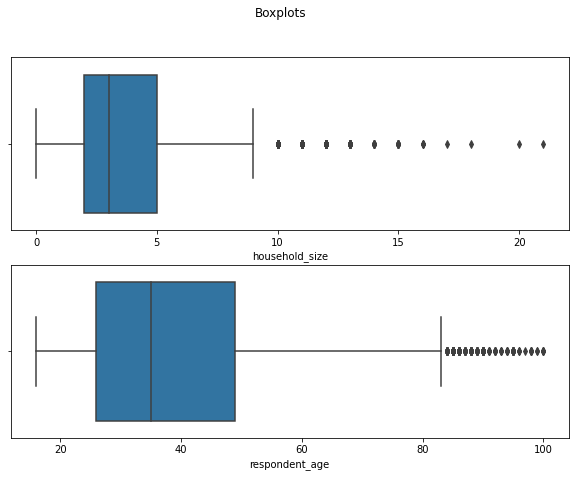

In [ ]:
#checking for anomalies in our dataset
fig, (ax1, ax2)= plt.subplots(2,figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(fin_df['household_size'], ax=ax1)
sns.boxplot(fin_df['respondent_age'], ax=ax2)
plt.show()


**Frequency distributions for Categorical variables**

In [178]:
#Generating the frequency distributions for categorical variables

fin_cat = fin_df.select_dtypes(include='object').columns.to_list()
for col in fin_cat:
  print(f'Column:{col}')
  print(fin_df[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column:country
Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64
**********


Column:bank_account
No     20044
Yes     3296
Name: bank_account, dtype: int64
**********


Column:location
Rural    14263
Urban     9077
Name: location, dtype: int64
**********


Column:cell_phone_access
Yes    17331
No      6009
Name: cell_phone_access, dtype: int64
**********


Column:respondent_gender
Female    13766
Male       9574
Name: respondent_gender, dtype: int64
**********


Column:relationship_with_head
Head of Household      12729
Spouse                  6470
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: relationship_with_head, dtype: int64
**********


Column:marital_status
Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64
****

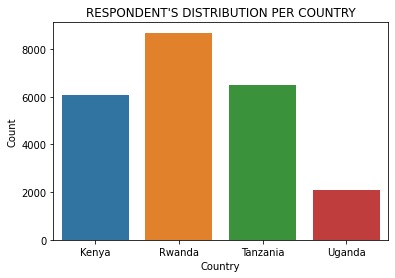

In [179]:
#Plotting a bar plot of the countries in our dataset 

# we use seaborn to create a bar chart
sns.countplot(x='country', data=fin_df)

# Labelling our x axis
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("RESPONDENT'S DISTRIBUTION PER COUNTRY")

# Displaying our chart
plt.show()



From the graph displayed we can see that majority of therespondents are from Rwanda and Uganda with the least respondents.

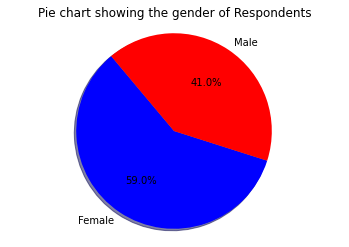

In [ ]:

# plotting a pie chart to show the gender of Respondents
gender = fin_df.groupby(['respondent_gender']).count().reset_index()

colors = ['blue', 'red']


# plotting the pie chart
plt.pie(age, labels=g, colors=colors, autopct='%1.1f%%', shadow=True, startangle=130)
#plt.pie(fare,explode= explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=130)

plt.title('Pie chart showing the gender of Respondents')
plt.axis('equal')
plt.show()

From the graph above we can see that the number of female respondents was higher than that of male.

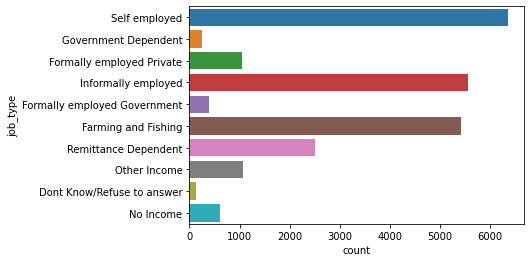

In [ ]:
# Plotting a bar plot of the respondent job type

# we use seaborn to create a bar chart
sns.countplot(y='job_type', data=fin_df)

In [ ]:
# Determining the kurtosis of household size
fin_df["household_size"].kurt()


# the kurtosis of household size is greater than zero, meaning that it is a leptokurtic distribution.

1.1538357462528523

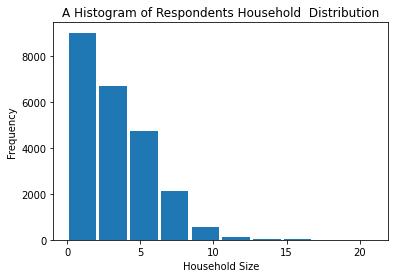

In [ ]:
#plotting a histogram to show the distribution of respondent's age

house = fin_df['household_size']
plt.hist(house, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.title('A Histogram of Respondents Household  Distribution')
plt.show()


The histogram above shows that the age distribution is skewed to the right meaning that the mean is greater than the mode

In [ ]:

#using measures of central tendency to prove the skewness of the histogram above.
# Finding the mean

print('The mean of the household size is' , fin_df['household_size'].mean())
# finding the mode
print('The mode of household size is' , fin_df['household_size'].mode())


The mean of the household size is 3.688560411311054
The mode of household size is 0    2.0
dtype: float64


In [ ]:
# Determining the kurtosis of age
fin_df["respondent_age"].kurt()

0.09826807013177241

The kurtosis of age is close to 0, meaning that it is a platykurtic distribution.
This means that fewer values in the distribtion are close to the mean

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


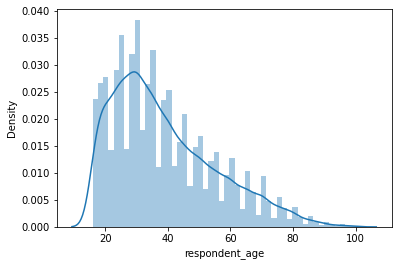

In [ ]:
#creating a histogram to show the distribution of respondent's age

sns.distplot(fin_df['respondent_age'], kde=True)


From the histogram above we can see that its skewed to the right,meaning that the mean of respondents age is greater than the mode

In [ ]:

#using measures of central tendency to prove the skewness of the histogram above.
# Finding the mean

print('The mean of the respondents age is' , fin_df['respondent_age'].mean())
# finding the mode
print('The mode of respondents age is' , fin_df['respondent_age'].mode())

The mean of the respondents age is 38.80706940874036
The mode of respondents age is 0    30.0
dtype: float64


**BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Respondent Age Vs Household size')

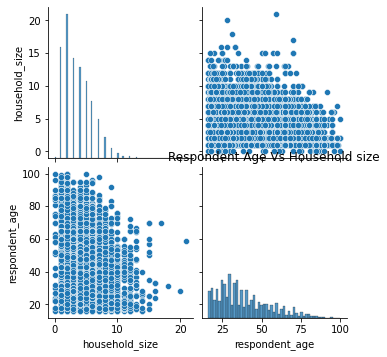

In [182]:
#Determining correlation between numeric features

sns.pairplot(fin_df[['household_size', 'respondent_age']])
plt.title('Respondent Age Vs Household size')

In [183]:
fin_df['respondent_age'].corr(fin_df['household_size'])

-0.11967115234154871

From the scatter plot and pearsons correlation,there is a weak negative correlation between the respondents age and household size.

**Hypothesis Tests**

In [191]:
# Investigate relationship between type of job and if the respondent has a bank account or not
job_bank = pd.crosstab(fin_df['bank_account'], fin_df['job_type'])
job_bank

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
bank_account,,,,,,,,,,
No,111,4788,87,481,197,5109,605,881,2268,5517
Yes,14,634,299,566,50,440,13,196,240,844



To test relationship between type of job and if the respondent has a bank account or not.

Null Hypothesis : Type of job has no influence on if an individual has a bank account or not

Alternative Hypothesis : Type of job influences on if an individual has a bank account or not

In [192]:

# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(job_bank.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 16.918977604620448, Test statistic: 2999.3140136394745
Alpha: 0.050000000000000044, p-value: 0.0


p-value is less than alpha, thus significant evidence to reject null hypothesis



In [195]:

# Investigate relationship between level of education and if the respondent has a bank account or not
table_edu = pd.crosstab(fin_df['bank_account'], fin_df['level_of_education'])
table_edu

level_of_education,6,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
bank_account,,,,,,,
No,22,4291,2,11605,3225,554,345
Yes,5,176,6,1083,981,589,456



To test relationship between level of education and if the respondent has a bank account or not.

Null Hypothesis : Level of education has no influence on if an individual has a bank account or not

Alternative Hypothesis : Level of education influences on if an individual has a bank account or not

In [196]:

stat, p, dof, expected = chi2_contingency(table_edu.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 12.591587243743977, Test statistic: 3556.1501757869482
Alpha: 0.050000000000000044, p-value: 0.0



p-value is less than alpha, test statistic exceed the critical value thus reject the null hypothesis.

In [198]:
# Investigate relationship between type of location and if the respondent has a bank account or not
table_loc = pd.crosstab(fin_df['bank_account'], fin_df['location'])
table_loc

location,Rural,Urban
bank_account,,
No,12600,7444
Yes,1663,1633



To test relationship between type of location and if the respondent has a bank account or not.

Null Hypothesis : Type of location does not influence if an individual has a bank account or not

Alternative Hypothesis : Type of location influences if an individual has a bank account or not

Text(0.5, 0, 'Has a bank account')

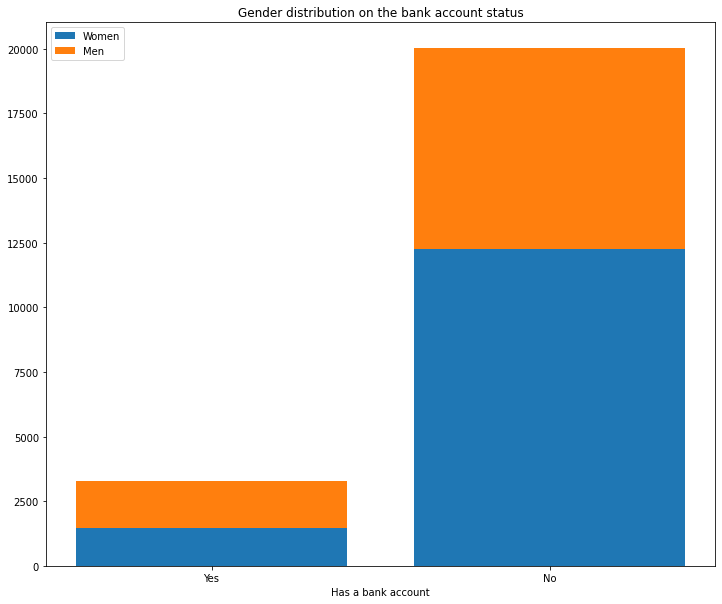

In [199]:
#cheking the gender distribuon on bank account status
bank_status = ['Yes', 'No']
women_number = [1477, 12271]
men_number = [1814, 7751]
x = [status for status in bank_status]
plt.figure(figsize=(12,10))
plt.bar(x, women_number, label='Women')
plt.bar(x, men_number, label='Men', bottom=women_number)
plt.title('Gender distribution on the bank account status')
plt.legend()
plt.xlabel('Has a bank account')

A significantly larger percentage of women have no bank accounts

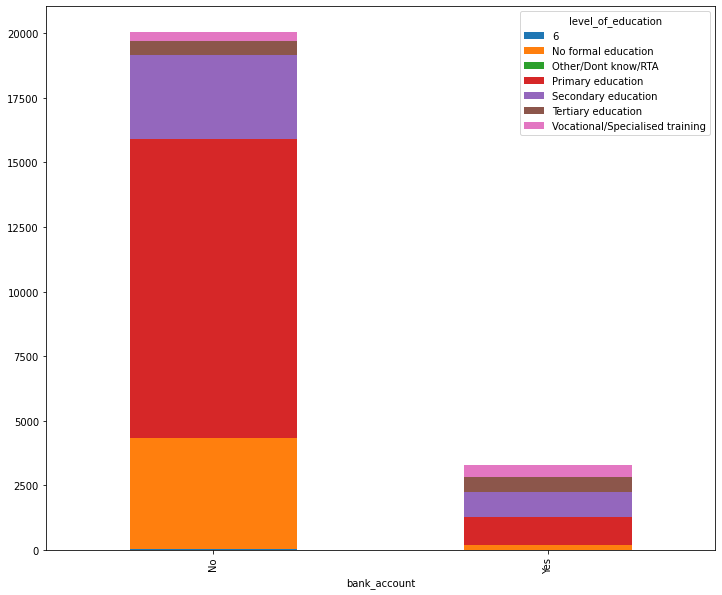

In [200]:
#checking the bank account status on education level
pd.crosstab(fin_df['bank_account'], fin_df['level_of_education']).plot(kind='bar', stacked=True, figsize=(12,10))

Majority of individuals with a bank account have a primary education level

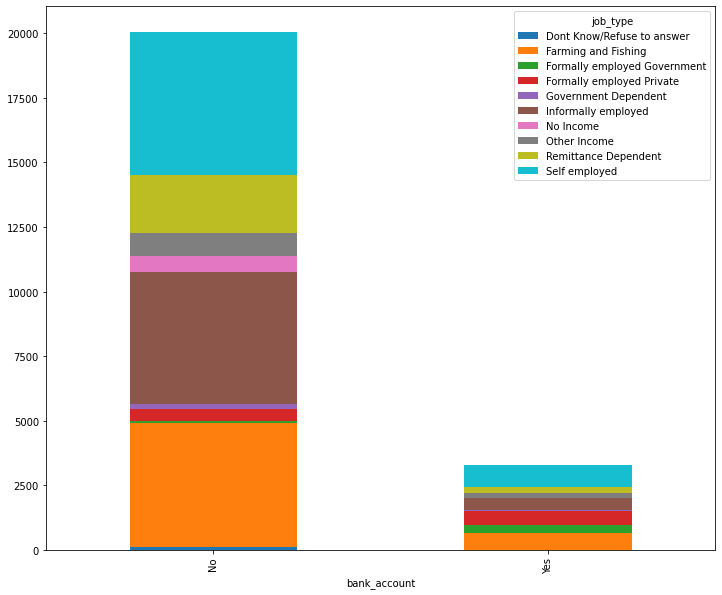

In [202]:
#CHECKING THE BANK ACCOUNT STATUS ON THE TYPE OF JOB
pd.crosstab(fin_df['bank_account'], fin_df['job_type']).plot(kind='bar',stacked=True, figsize=(12,10))

Majority of individuals with a bank account are either self employed, have a formal private employment or participate in farming and fishing. Largest percentage of individuals with no bank account are self employed, informally employed or practice farming and fishing.

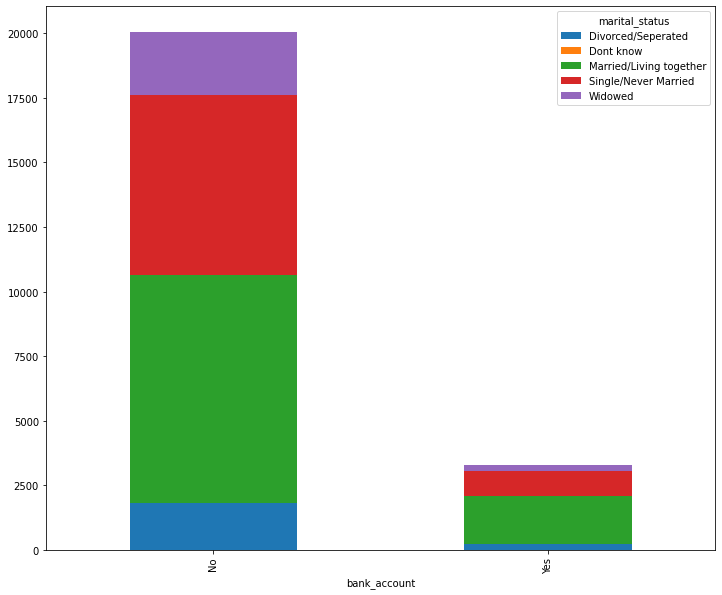

In [203]:
#checking bank account status on marital status
pd.crosstab(fin_df['bank_account'], fin_df['marital_status']).plot(kind='bar', stacked=True, figsize=(12,10))

The largest percentage of individuals with bank accounts and without bank accounts are married/living together.

**MULTIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Respondents with bank accounts')

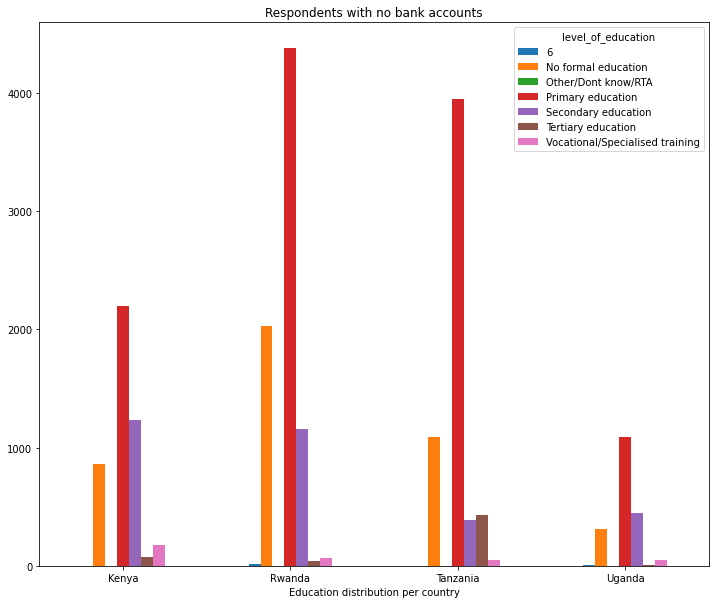

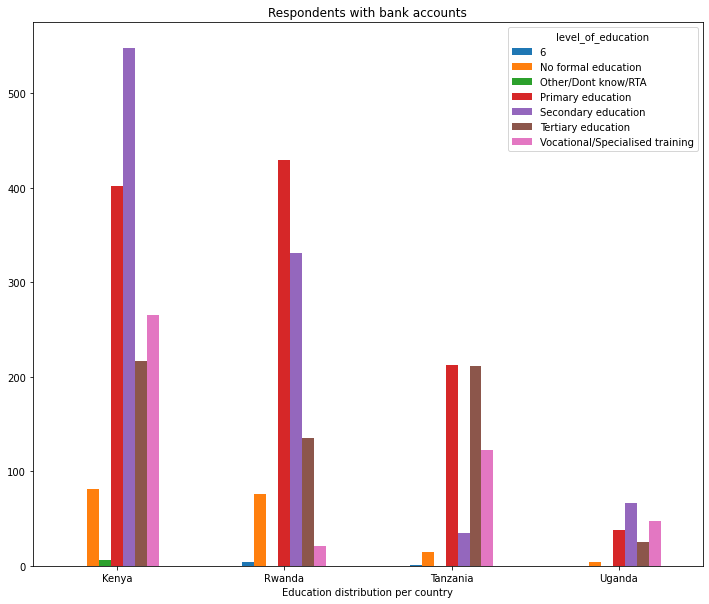

In [186]:
#Investigating relationships between country,level of education and bank account status

# Investigate relationship between country, level of education and bank account status
country_edu = pd.crosstab(index=[fin_df['bank_account'],fin_df['country']], columns=fin_df['level_of_education'])

country_edu.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with no bank accounts')

country_edu.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with bank accounts')


For each country, the level of education with the highest number of respondents with bank accounts:

Kenya : Secondary Education,
Rwanda : Primary education,
Tanzania : Primary/Tertiary Education,
Uganda : Secondary education

In all countries, the level of education with the highest number of respondents with no bank accounts is primary education.

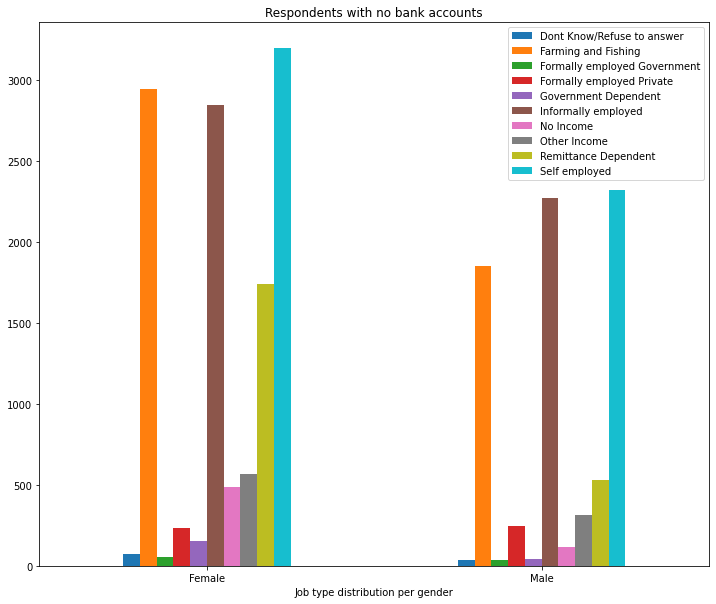

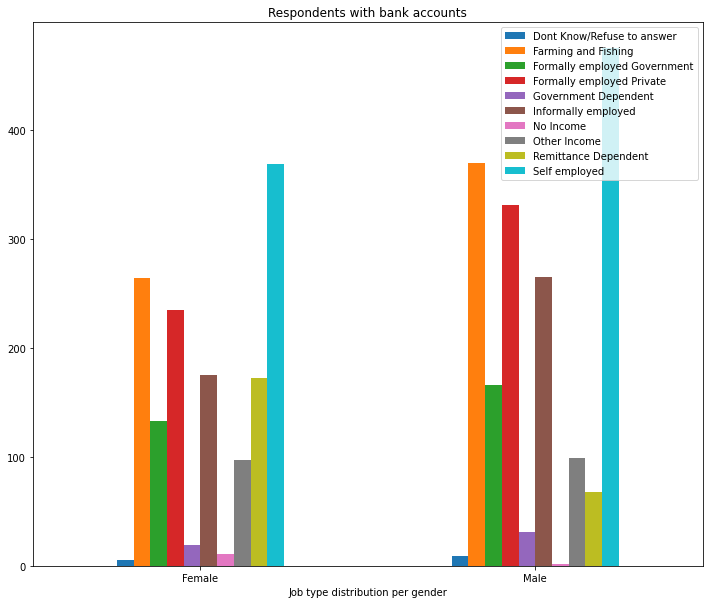

In [188]:

# Investigate relationship between gender, type of job and bank account status
gender_job = pd.crosstab(index=[fin_df['bank_account'],fin_df['respondent_gender']], columns=fin_df['job_type'])

gender_job.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

gender_job.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')

From the graphs above,For both women and men, the highest proportion of respondents with the following types of jobs have bank accounts:

Self employed

Farming and fishing

Formally employed private

Informally employed


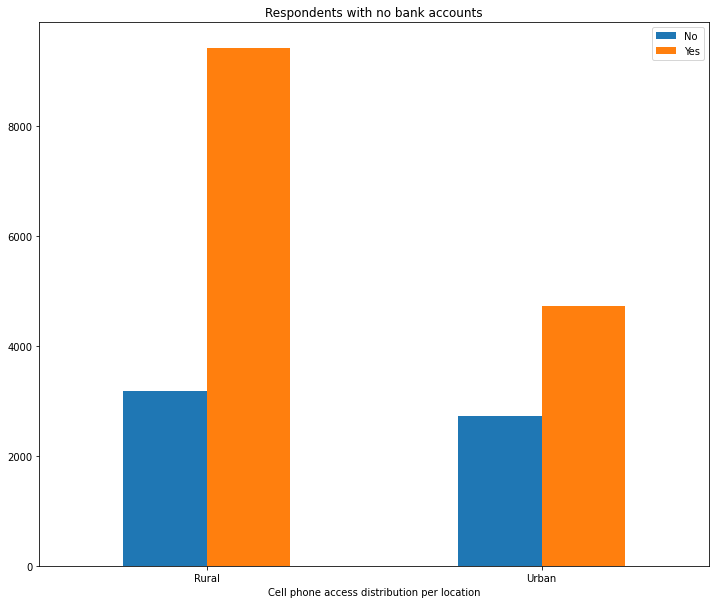

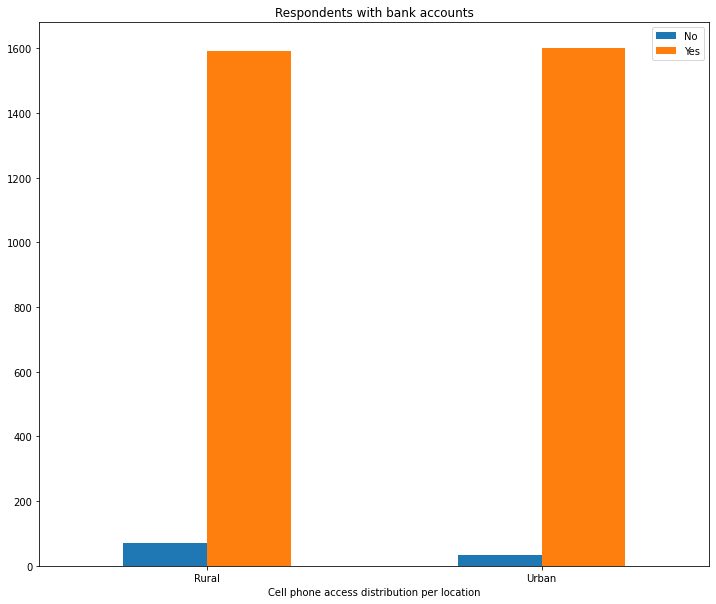

In [190]:
# Investigate relationship between cell access, location and bank account status
loc_cell = pd.crosstab(index=[fin_df['bank_account'],fin_df['location']], columns=fin_df['cell_phone_access'])

loc_cell.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

loc_cell.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')



Access to a cell phone is relatively the same for individuals with bank accounts regardless on location

**LINEAR DISCRIMINANT ANALYSIS**

In [206]:

# Encode categorical features
df = fin_df.drop('bank_account', axis=1)

#Convert year variable to object
df['year'] = df['year'].astype('object')

# Get categorical codes for categorical columns
categorical_columns = ['country', 'year', 'location', 'cell_phone_access', 'respondent_gender', 'relationship_with_head', 'marital_status', 'level_of_education','job_type']

for col in categorical_columns:
  df[col] = df[col].astype('category').cat.codes

In [207]:
#previewing our dataset
df.head(3)

,country,year,location,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,level_of_education,job_type
0,0,2,0,1,3.0,24.0,0,5,2,4,9
1,0,2,0,0,5.0,70.0,0,1,4,1,4
2,0,2,1,1,5.0,26.0,1,3,3,6,9


In [208]:
from sklearn.preprocessing import LabelBinarizer
Y = fin_df['bank_account']
print(Y.head())
Y = LabelBinarizer().fit_transform(Y)
print(Y[:5])

0    Yes
1     No
2    Yes
3     No
4     No
Name: bank_account, dtype: object
[[1]
 [0]
 [1]
 [0]
 [0]]


In [210]:

# Split data into test and train sets, set test set to 30% of total data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=.3, random_state=42, stratify=Y)

In [213]:

# Perform linear discrimant analysis to separate two classes
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)
# Determine explained variance ratio
lda.explained_variance_ratio_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([1.])

In [214]:

# Test accuracy of lda classifier
lda_pred = lda.predict(x_test)
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6013
           1       0.65      0.24      0.35       989

    accuracy                           0.87      7002
   macro avg       0.77      0.61      0.64      7002
weighted avg       0.85      0.87      0.85      7002



In [215]:
# Get confusion matrix
pd.DataFrame(data=confusion_matrix(y_test,lda_pred), index=[0,1], columns=[0,1])

,0,1
0,5882,131
1,749,240


The LDA classifier has a 88% accuracy, however owing to imbalance in the target variable is relatively poor with a high number of false negatives.

**RECOMMENDATION**

From the bivariate and multivariate analysis we can use the following factors to predict whether an individual is likely to have or use a bank account:

-Education Level

-Marital Status

-Type of Job

-Access to a Cell phone

-Respondent Gender



**CONCLUSION**

From the analysis,we can see that the number of individuals without access to bank services is higher in rurals for all countries except in Tanzania where many people from urban had no access to bank services.

The number of people without bank accounts is higher in rural areas than in urban areas.

Based on gender,more female had access to bank services compared to male.

Kenya had many individuals with a bank account followed by Rwanda then Tanzania and Uganda with the least people with a bank account.